In [35]:
from scipy.io import loadmat
annots = loadmat('cars_annos.mat')

In [2]:
import os
import cv2
from PIL import Image
import numpy as np

In [42]:
    annotations = annots['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    class_ids = []
    bboxes = []
    labels = []

    for annotation in annotations:
        bbox_x1 = annotation[0][1][0][0]
        bbox_y1 = annotation[0][2][0][0]
        bbox_x2 = annotation[0][3][0][0]
        bbox_y2 = annotation[0][4][0][0]
        class_id = annotation[0][5][0][0]-1
        labels.append('%04d' % (class_id,))
        fname = annotation[0][0][0][8:18]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)

In [43]:
labels_count = np.unique(class_ids).shape[0]
print(np.unique(class_ids))
print('The number of different cars is %d' % labels_count)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195]
The number of different cars is 196


In [5]:
fnames

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

In [94]:
data = [[row.flat[0] for row in line] for line in annots["annotations"][0]]
bboxes

[(112, 7, 853, 717),
 (48, 24, 441, 202),
 (7, 4, 277, 180),
 (33, 50, 197, 150),
 (5, 8, 83, 58),
 (10, 6, 250, 110),
 (56, 1, 394, 176),
 (1, 13, 113, 83),
 (15, 111, 271, 272),
 (14, 18, 148, 107),
 (5, 8, 91, 59),
 (29, 18, 157, 86),
 (1, 1, 300, 179),
 (9, 1, 152, 103),
 (4, 15, 94, 63),
 (12, 16, 117, 71),
 (1, 5, 160, 89),
 (46, 84, 661, 428),
 (86, 81, 371, 252),
 (26, 32, 677, 418),
 (50, 127, 587, 396),
 (6, 9, 124, 89),
 (52, 25, 751, 507),
 (3, 23, 132, 98),
 (60, 76, 593, 393),
 (21, 18, 492, 316),
 (11, 31, 490, 266),
 (8, 3, 135, 86),
 (30, 65, 331, 199),
 (5, 14, 93, 58),
 (125, 645, 1845, 1421),
 (20, 48, 385, 283),
 (51, 73, 570, 426),
 (79, 469, 1537, 1198),
 (18, 18, 328, 190),
 (13, 235, 2021, 1253),
 (6, 20, 123, 88),
 (26, 25, 283, 157),
 (61, 98, 458, 376),
 (111, 213, 907, 683),
 (178, 214, 901, 658),
 (9, 14, 490, 368),
 (28, 48, 663, 302),
 (4, 9, 96, 88),
 (6, 7, 94, 68),
 (14, 16, 268, 169),
 (10, 18, 89, 61),
 (111, 54, 365, 190),
 (9, 33, 479, 276),
 (9, 

In [57]:
from PIL import Image
import os

In [8]:
if not os.path.exists('png-files-2'):
    os.mkdir('png-files-2')
    
def save_data_png(fnames):
    names = []
    num_samples = len(fnames)
    src_folder = 'png-files-2'
    for i in range(num_samples):
        print('saving ', fnames[i])
        
        #Load the Image
        imgo = cv2.imread(os.path.join('car_ims', fnames[i]))
        height, width = imgo.shape[:2]

    #Create a mask holder
        mask = np.zeros(imgo.shape[:2],np.uint8)

    #Grab Cut the object
        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)

    #Hard Coding the Rect The object must lie within this rect.
        rect = (10,10,width-30,height-30)
        cv2.grabCut(imgo,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
        mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        img1 = imgo*mask[:,:,np.newaxis]

    #Get the background
        background = imgo - img1

    #Change all pixels in the background that are not black to white
        background[np.where((background > [0,0,0]).all(axis = 2))] = [255,255,255]

    #Add the background and the image
        final = background + img1

        image = cv2.resize(src=final, dsize=(100,100))

#im = Image.fromarray(image, 'RGB')
#im = im.convert('L')

#To be done - Smoothening the edges

        path = 'png-files-2'
        name = fnames[i][0:6]+'.png'
        cv2.imwrite(os.path.join(path , name), image)


In [26]:
fnames[0]

'000001.jpg'

## Background Removal

In [30]:
if not os.path.exists('png-files-2'):
    os.mkdir('png-files-2')
    
def save_data_png2(fnames,bboxes):
    names = []
    num_samples = len(fnames)
    src_folder = 'png-files-3'
    for i in range(num_samples):
        print('saving ', fnames[i])
        
        img  = cv2.imread(os.path.join('car_ims', fnames[i]))
        mask = np.zeros(img.shape[:2],np.uint8)

        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)

        rect = bboxes[i]
        cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

        mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        img = img*mask2[:,:,np.newaxis]

        path = 'png-files-2'
        name = fnames[i][0:6]+'.png'
        cv2.imwrite(os.path.join(path , name), img)

        
save_data_png2(fnames,bboxes)

saving  000001.jpg
saving  000002.jpg
saving  000003.jpg
saving  000004.jpg
saving  000005.jpg
saving  000006.jpg
saving  000007.jpg
saving  000008.jpg
saving  000009.jpg
saving  000010.jpg
saving  000011.jpg
saving  000012.jpg
saving  000013.jpg
saving  000014.jpg
saving  000015.jpg
saving  000016.jpg
saving  000017.jpg
saving  000018.jpg
saving  000019.jpg
saving  000020.jpg
saving  000021.jpg
saving  000022.jpg
saving  000023.jpg
saving  000024.jpg
saving  000025.jpg
saving  000026.jpg
saving  000027.jpg
saving  000028.jpg
saving  000029.jpg
saving  000030.jpg
saving  000031.jpg
saving  000032.jpg
saving  000033.jpg
saving  000034.jpg
saving  000035.jpg
saving  000036.jpg
saving  000037.jpg
saving  000038.jpg
saving  000039.jpg
saving  000040.jpg
saving  000041.jpg
saving  000042.jpg
saving  000043.jpg
saving  000044.jpg
saving  000045.jpg
saving  000046.jpg
saving  000047.jpg
saving  000048.jpg
saving  000049.jpg
saving  000050.jpg
saving  000051.jpg
saving  000052.jpg
saving  0000

saving  000433.jpg
saving  000434.jpg
saving  000435.jpg
saving  000436.jpg
saving  000437.jpg
saving  000438.jpg
saving  000439.jpg
saving  000440.jpg
saving  000441.jpg
saving  000442.jpg
saving  000443.jpg
saving  000444.jpg
saving  000445.jpg
saving  000446.jpg
saving  000447.jpg
saving  000448.jpg
saving  000449.jpg
saving  000450.jpg
saving  000451.jpg
saving  000452.jpg
saving  000453.jpg
saving  000454.jpg
saving  000455.jpg
saving  000456.jpg
saving  000457.jpg
saving  000458.jpg
saving  000459.jpg
saving  000460.jpg
saving  000461.jpg
saving  000462.jpg
saving  000463.jpg
saving  000464.jpg
saving  000465.jpg
saving  000466.jpg
saving  000467.jpg
saving  000468.jpg
saving  000469.jpg
saving  000470.jpg
saving  000471.jpg
saving  000472.jpg
saving  000473.jpg
saving  000474.jpg
saving  000475.jpg
saving  000476.jpg
saving  000477.jpg
saving  000478.jpg
saving  000479.jpg
saving  000480.jpg
saving  000481.jpg
saving  000482.jpg
saving  000483.jpg
saving  000484.jpg
saving  0004

saving  000865.jpg
saving  000866.jpg
saving  000867.jpg
saving  000868.jpg
saving  000869.jpg
saving  000870.jpg
saving  000871.jpg
saving  000872.jpg
saving  000873.jpg
saving  000874.jpg
saving  000875.jpg
saving  000876.jpg
saving  000877.jpg
saving  000878.jpg
saving  000879.jpg
saving  000880.jpg
saving  000881.jpg
saving  000882.jpg
saving  000883.jpg
saving  000884.jpg
saving  000885.jpg
saving  000886.jpg
saving  000887.jpg
saving  000888.jpg
saving  000889.jpg
saving  000890.jpg
saving  000891.jpg
saving  000892.jpg
saving  000893.jpg
saving  000894.jpg
saving  000895.jpg
saving  000896.jpg
saving  000897.jpg
saving  000898.jpg
saving  000899.jpg
saving  000900.jpg
saving  000901.jpg
saving  000902.jpg
saving  000903.jpg
saving  000904.jpg
saving  000905.jpg
saving  000906.jpg
saving  000907.jpg
saving  000908.jpg
saving  000909.jpg
saving  000910.jpg
saving  000911.jpg
saving  000912.jpg
saving  000913.jpg
saving  000914.jpg
saving  000915.jpg
saving  000916.jpg
saving  0009

saving  001297.jpg
saving  001298.jpg
saving  001299.jpg
saving  001300.jpg
saving  001301.jpg
saving  001302.jpg
saving  001303.jpg
saving  001304.jpg
saving  001305.jpg
saving  001306.jpg
saving  001307.jpg
saving  001308.jpg
saving  001309.jpg
saving  001310.jpg
saving  001311.jpg
saving  001312.jpg
saving  001313.jpg
saving  001314.jpg
saving  001315.jpg
saving  001316.jpg
saving  001317.jpg
saving  001318.jpg
saving  001319.jpg
saving  001320.jpg
saving  001321.jpg
saving  001322.jpg
saving  001323.jpg
saving  001324.jpg
saving  001325.jpg
saving  001326.jpg
saving  001327.jpg
saving  001328.jpg
saving  001329.jpg
saving  001330.jpg
saving  001331.jpg
saving  001332.jpg
saving  001333.jpg
saving  001334.jpg
saving  001335.jpg
saving  001336.jpg
saving  001337.jpg
saving  001338.jpg
saving  001339.jpg
saving  001340.jpg
saving  001341.jpg
saving  001342.jpg
saving  001343.jpg
saving  001344.jpg
saving  001345.jpg
saving  001346.jpg
saving  001347.jpg
saving  001348.jpg
saving  0013

saving  001729.jpg
saving  001730.jpg
saving  001731.jpg
saving  001732.jpg
saving  001733.jpg
saving  001734.jpg
saving  001735.jpg
saving  001736.jpg
saving  001737.jpg
saving  001738.jpg
saving  001739.jpg
saving  001740.jpg
saving  001741.jpg
saving  001742.jpg
saving  001743.jpg
saving  001744.jpg
saving  001745.jpg
saving  001746.jpg
saving  001747.jpg
saving  001748.jpg
saving  001749.jpg
saving  001750.jpg
saving  001751.jpg
saving  001752.jpg
saving  001753.jpg
saving  001754.jpg
saving  001755.jpg
saving  001756.jpg
saving  001757.jpg
saving  001758.jpg
saving  001759.jpg
saving  001760.jpg
saving  001761.jpg
saving  001762.jpg
saving  001763.jpg
saving  001764.jpg
saving  001765.jpg
saving  001766.jpg
saving  001767.jpg
saving  001768.jpg
saving  001769.jpg
saving  001770.jpg
saving  001771.jpg
saving  001772.jpg
saving  001773.jpg
saving  001774.jpg
saving  001775.jpg
saving  001776.jpg
saving  001777.jpg
saving  001778.jpg
saving  001779.jpg
saving  001780.jpg
saving  0017

saving  002161.jpg
saving  002162.jpg
saving  002163.jpg
saving  002164.jpg
saving  002165.jpg
saving  002166.jpg
saving  002167.jpg
saving  002168.jpg
saving  002169.jpg
saving  002170.jpg
saving  002171.jpg
saving  002172.jpg
saving  002173.jpg
saving  002174.jpg
saving  002175.jpg
saving  002176.jpg
saving  002177.jpg
saving  002178.jpg
saving  002179.jpg
saving  002180.jpg
saving  002181.jpg
saving  002182.jpg
saving  002183.jpg
saving  002184.jpg
saving  002185.jpg
saving  002186.jpg
saving  002187.jpg
saving  002188.jpg
saving  002189.jpg
saving  002190.jpg
saving  002191.jpg
saving  002192.jpg
saving  002193.jpg
saving  002194.jpg
saving  002195.jpg
saving  002196.jpg
saving  002197.jpg
saving  002198.jpg
saving  002199.jpg
saving  002200.jpg
saving  002201.jpg
saving  002202.jpg
saving  002203.jpg
saving  002204.jpg
saving  002205.jpg
saving  002206.jpg
saving  002207.jpg
saving  002208.jpg
saving  002209.jpg
saving  002210.jpg
saving  002211.jpg
saving  002212.jpg
saving  0022

saving  002593.jpg
saving  002594.jpg
saving  002595.jpg
saving  002596.jpg
saving  002597.jpg
saving  002598.jpg
saving  002599.jpg
saving  002600.jpg
saving  002601.jpg
saving  002602.jpg
saving  002603.jpg
saving  002604.jpg
saving  002605.jpg
saving  002606.jpg
saving  002607.jpg
saving  002608.jpg
saving  002609.jpg
saving  002610.jpg
saving  002611.jpg
saving  002612.jpg
saving  002613.jpg
saving  002614.jpg
saving  002615.jpg
saving  002616.jpg
saving  002617.jpg
saving  002618.jpg
saving  002619.jpg
saving  002620.jpg
saving  002621.jpg
saving  002622.jpg
saving  002623.jpg
saving  002624.jpg
saving  002625.jpg
saving  002626.jpg
saving  002627.jpg
saving  002628.jpg
saving  002629.jpg
saving  002630.jpg
saving  002631.jpg
saving  002632.jpg
saving  002633.jpg
saving  002634.jpg
saving  002635.jpg
saving  002636.jpg
saving  002637.jpg
saving  002638.jpg
saving  002639.jpg
saving  002640.jpg
saving  002641.jpg
saving  002642.jpg
saving  002643.jpg
saving  002644.jpg
saving  0026

saving  003025.jpg
saving  003026.jpg
saving  003027.jpg
saving  003028.jpg
saving  003029.jpg
saving  003030.jpg
saving  003031.jpg
saving  003032.jpg
saving  003033.jpg
saving  003034.jpg
saving  003035.jpg
saving  003036.jpg
saving  003037.jpg
saving  003038.jpg
saving  003039.jpg
saving  003040.jpg
saving  003041.jpg
saving  003042.jpg
saving  003043.jpg
saving  003044.jpg
saving  003045.jpg
saving  003046.jpg
saving  003047.jpg
saving  003048.jpg
saving  003049.jpg
saving  003050.jpg
saving  003051.jpg
saving  003052.jpg
saving  003053.jpg
saving  003054.jpg
saving  003055.jpg
saving  003056.jpg
saving  003057.jpg
saving  003058.jpg
saving  003059.jpg
saving  003060.jpg
saving  003061.jpg
saving  003062.jpg
saving  003063.jpg
saving  003064.jpg
saving  003065.jpg
saving  003066.jpg
saving  003067.jpg
saving  003068.jpg
saving  003069.jpg
saving  003070.jpg
saving  003071.jpg
saving  003072.jpg
saving  003073.jpg
saving  003074.jpg
saving  003075.jpg
saving  003076.jpg
saving  0030

saving  003457.jpg
saving  003458.jpg
saving  003459.jpg
saving  003460.jpg
saving  003461.jpg
saving  003462.jpg
saving  003463.jpg
saving  003464.jpg
saving  003465.jpg
saving  003466.jpg
saving  003467.jpg
saving  003468.jpg
saving  003469.jpg
saving  003470.jpg
saving  003471.jpg
saving  003472.jpg
saving  003473.jpg
saving  003474.jpg
saving  003475.jpg
saving  003476.jpg
saving  003477.jpg
saving  003478.jpg
saving  003479.jpg
saving  003480.jpg
saving  003481.jpg
saving  003482.jpg
saving  003483.jpg
saving  003484.jpg
saving  003485.jpg
saving  003486.jpg
saving  003487.jpg
saving  003488.jpg
saving  003489.jpg
saving  003490.jpg
saving  003491.jpg
saving  003492.jpg
saving  003493.jpg
saving  003494.jpg
saving  003495.jpg
saving  003496.jpg
saving  003497.jpg
saving  003498.jpg
saving  003499.jpg
saving  003500.jpg
saving  003501.jpg
saving  003502.jpg
saving  003503.jpg
saving  003504.jpg
saving  003505.jpg
saving  003506.jpg
saving  003507.jpg
saving  003508.jpg
saving  0035

saving  003889.jpg
saving  003890.jpg
saving  003891.jpg
saving  003892.jpg
saving  003893.jpg
saving  003894.jpg
saving  003895.jpg
saving  003896.jpg
saving  003897.jpg
saving  003898.jpg
saving  003899.jpg
saving  003900.jpg
saving  003901.jpg
saving  003902.jpg
saving  003903.jpg
saving  003904.jpg
saving  003905.jpg
saving  003906.jpg
saving  003907.jpg
saving  003908.jpg
saving  003909.jpg
saving  003910.jpg
saving  003911.jpg
saving  003912.jpg
saving  003913.jpg
saving  003914.jpg
saving  003915.jpg
saving  003916.jpg
saving  003917.jpg
saving  003918.jpg
saving  003919.jpg
saving  003920.jpg
saving  003921.jpg
saving  003922.jpg
saving  003923.jpg
saving  003924.jpg
saving  003925.jpg
saving  003926.jpg
saving  003927.jpg
saving  003928.jpg
saving  003929.jpg
saving  003930.jpg
saving  003931.jpg
saving  003932.jpg
saving  003933.jpg
saving  003934.jpg
saving  003935.jpg
saving  003936.jpg
saving  003937.jpg
saving  003938.jpg
saving  003939.jpg
saving  003940.jpg
saving  0039

saving  004321.jpg
saving  004322.jpg
saving  004323.jpg
saving  004324.jpg
saving  004325.jpg
saving  004326.jpg
saving  004327.jpg
saving  004328.jpg
saving  004329.jpg
saving  004330.jpg
saving  004331.jpg
saving  004332.jpg
saving  004333.jpg
saving  004334.jpg
saving  004335.jpg
saving  004336.jpg
saving  004337.jpg
saving  004338.jpg
saving  004339.jpg
saving  004340.jpg
saving  004341.jpg
saving  004342.jpg
saving  004343.jpg
saving  004344.jpg
saving  004345.jpg
saving  004346.jpg
saving  004347.jpg
saving  004348.jpg
saving  004349.jpg
saving  004350.jpg
saving  004351.jpg
saving  004352.jpg
saving  004353.jpg
saving  004354.jpg
saving  004355.jpg
saving  004356.jpg
saving  004357.jpg
saving  004358.jpg
saving  004359.jpg
saving  004360.jpg
saving  004361.jpg
saving  004362.jpg
saving  004363.jpg
saving  004364.jpg
saving  004365.jpg
saving  004366.jpg
saving  004367.jpg
saving  004368.jpg
saving  004369.jpg
saving  004370.jpg
saving  004371.jpg
saving  004372.jpg
saving  0043

saving  004753.jpg
saving  004754.jpg
saving  004755.jpg
saving  004756.jpg
saving  004757.jpg
saving  004758.jpg
saving  004759.jpg
saving  004760.jpg
saving  004761.jpg
saving  004762.jpg
saving  004763.jpg
saving  004764.jpg
saving  004765.jpg
saving  004766.jpg
saving  004767.jpg
saving  004768.jpg
saving  004769.jpg
saving  004770.jpg
saving  004771.jpg
saving  004772.jpg
saving  004773.jpg
saving  004774.jpg
saving  004775.jpg
saving  004776.jpg
saving  004777.jpg
saving  004778.jpg
saving  004779.jpg
saving  004780.jpg
saving  004781.jpg
saving  004782.jpg
saving  004783.jpg
saving  004784.jpg
saving  004785.jpg
saving  004786.jpg
saving  004787.jpg
saving  004788.jpg
saving  004789.jpg
saving  004790.jpg
saving  004791.jpg
saving  004792.jpg
saving  004793.jpg
saving  004794.jpg
saving  004795.jpg
saving  004796.jpg
saving  004797.jpg
saving  004798.jpg
saving  004799.jpg
saving  004800.jpg
saving  004801.jpg
saving  004802.jpg
saving  004803.jpg
saving  004804.jpg
saving  0048

saving  005185.jpg
saving  005186.jpg
saving  005187.jpg
saving  005188.jpg
saving  005189.jpg
saving  005190.jpg
saving  005191.jpg
saving  005192.jpg
saving  005193.jpg
saving  005194.jpg
saving  005195.jpg
saving  005196.jpg
saving  005197.jpg
saving  005198.jpg
saving  005199.jpg
saving  005200.jpg
saving  005201.jpg
saving  005202.jpg
saving  005203.jpg
saving  005204.jpg
saving  005205.jpg
saving  005206.jpg
saving  005207.jpg
saving  005208.jpg
saving  005209.jpg
saving  005210.jpg
saving  005211.jpg
saving  005212.jpg
saving  005213.jpg
saving  005214.jpg
saving  005215.jpg
saving  005216.jpg
saving  005217.jpg
saving  005218.jpg
saving  005219.jpg
saving  005220.jpg
saving  005221.jpg
saving  005222.jpg
saving  005223.jpg
saving  005224.jpg
saving  005225.jpg
saving  005226.jpg
saving  005227.jpg
saving  005228.jpg
saving  005229.jpg
saving  005230.jpg
saving  005231.jpg
saving  005232.jpg
saving  005233.jpg
saving  005234.jpg
saving  005235.jpg
saving  005236.jpg
saving  0052

KeyboardInterrupt: 

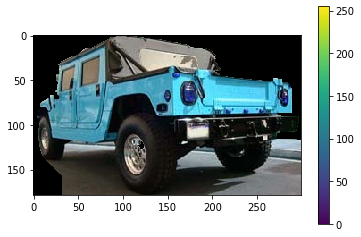

(<matplotlib.image.AxesImage at 0x106c08780>,
 None)

In [24]:
from matplotlib import pyplot as plt

img = cv2.imread('car_ims/000013.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = bboxes[12]
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

460


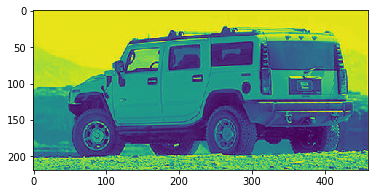

100

In [140]:
image = Image.open('car_ims/000002.jpg')

imag = np.array(image.convert('L'))

print(imag.shape[1])

from matplotlib import image
from matplotlib import pyplot
# summarize shape of the pixel array

# display the array of pixels as an image
pyplot.imshow(imag)
pyplot.show()

im.shape[0]


In [9]:
save_data_png(fnames)

saving  000001.jpg
saving  000002.jpg
saving  000003.jpg
saving  000004.jpg
saving  000005.jpg
saving  000006.jpg
saving  000007.jpg
saving  000008.jpg
saving  000009.jpg
saving  000010.jpg
saving  000011.jpg
saving  000012.jpg
saving  000013.jpg
saving  000014.jpg
saving  000015.jpg
saving  000016.jpg
saving  000017.jpg
saving  000018.jpg
saving  000019.jpg
saving  000020.jpg
saving  000021.jpg
saving  000022.jpg
saving  000023.jpg
saving  000024.jpg
saving  000025.jpg
saving  000026.jpg
saving  000027.jpg
saving  000028.jpg
saving  000029.jpg
saving  000030.jpg
saving  000031.jpg
saving  000032.jpg
saving  000033.jpg
saving  000034.jpg
saving  000035.jpg
saving  000036.jpg
saving  000037.jpg
saving  000038.jpg
saving  000039.jpg
saving  000040.jpg
saving  000041.jpg
saving  000042.jpg
saving  000043.jpg
saving  000044.jpg
saving  000045.jpg
saving  000046.jpg
saving  000047.jpg
saving  000048.jpg
saving  000049.jpg
saving  000050.jpg
saving  000051.jpg
saving  000052.jpg
saving  0000

KeyboardInterrupt: 

In [32]:
names = []

for i in range(len(fnames)):
    names.append(fnames[i][0:6]+'.png')

In [33]:
names

['000001.png',
 '000002.png',
 '000003.png',
 '000004.png',
 '000005.png',
 '000006.png',
 '000007.png',
 '000008.png',
 '000009.png',
 '000010.png',
 '000011.png',
 '000012.png',
 '000013.png',
 '000014.png',
 '000015.png',
 '000016.png',
 '000017.png',
 '000018.png',
 '000019.png',
 '000020.png',
 '000021.png',
 '000022.png',
 '000023.png',
 '000024.png',
 '000025.png',
 '000026.png',
 '000027.png',
 '000028.png',
 '000029.png',
 '000030.png',
 '000031.png',
 '000032.png',
 '000033.png',
 '000034.png',
 '000035.png',
 '000036.png',
 '000037.png',
 '000038.png',
 '000039.png',
 '000040.png',
 '000041.png',
 '000042.png',
 '000043.png',
 '000044.png',
 '000045.png',
 '000046.png',
 '000047.png',
 '000048.png',
 '000049.png',
 '000050.png',
 '000051.png',
 '000052.png',
 '000053.png',
 '000054.png',
 '000055.png',
 '000056.png',
 '000057.png',
 '000058.png',
 '000059.png',
 '000060.png',
 '000061.png',
 '000062.png',
 '000063.png',
 '000064.png',
 '000065.png',
 '000066.png',
 '000067.p

In [44]:
import pandas as pd

df_train = pd.DataFrame(list(zip(class_ids,names)), columns=['class_label','image_name'])
df_train.head()

,class_label,image_name
0,0,000001.png
1,0,000002.png
2,0,000003.png
3,0,000004.png
4,0,000005.png


In [45]:
df_shuffled = df_train.sample(n=df_train.shape[0], random_state=123)
print(len(df_shuffled)*0.4)
print(len(df_shuffled)*0.1)
print(len(df_shuffled)*0.5)

6474.0
1618.5
8092.5


In [46]:
df_trainset = df_shuffled.iloc[:12948]
df_validset = df_shuffled.iloc[12948:15376]
df_testset = df_shuffled.iloc[15376:]

In [47]:
print(len(df_trainset))
print(len(df_validset))
print(len(df_testset))

6474
1618
8093


In [48]:
df_trainset.to_csv('train.csv', index=None)
df_validset.to_csv('valid.csv', index=None)
df_testset.to_csv('test.csv', index=None)